## 1) Mount the Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
# !git clone https://github.com/nasirtrekker/DeepLearning_MaskRCNN.git

In [ ]:
ls

 CarPartsDamageDetection/
 Car_Parts_Damage_Detection_Detectron2.pptx
 CarPartsDetectionChallenge-master/
'Colab Notebooks'/
 DeepLearning_MaskRCNN/
 Ishan_Car_Damage_Parts_Prediction_Using_MaskRCNN.ipynb


In [ ]:
cd DeepLearning_MaskRCNN/car-damage-detection-using-CNN

/content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN


## 2) Car Damage Detection with MaskRCNN

#### Data visualization of car damage and automated car damage detection  

In [ ]:
# !git clone https://github.com/matterport/Mask_RCNN.git

In [ ]:
%cd Mask_RCNN/

/content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/Mask_RCNN


In [ ]:
!pip3 install -r '/content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/Mask_RCNN/requirements.txt'

In [ ]:
!python3 setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
adding licens

In [ ]:
# !pip install tensorflow==1.14.0
!pip install keras==2.4.0

In [ ]:
!pip show mask_rcnn

Name: mask-rcnn
Version: 2.1
Summary: Mask R-CNN for object detection and instance segmentation
Home-page: https://github.com/matterport/Mask_RCNN
Author: Matterport
Author-email: waleed.abdulla@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages/mask_rcnn-2.1-py3.7.egg
Requires: 
Required-by: 


In [ ]:
!pip3 show tensorflow

Name: tensorflow
Version: 2.5.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: termcolor, tensorflow-estimator, typing-extensions, google-pasta, six, grpcio, h5py, gast, wheel, protobuf, wrapt, absl-py, opt-einsum, numpy, flatbuffers, tensorboard, keras-nightly, astunparse, keras-preprocessing
Required-by: Keras, kapre


In [ ]:
!pip3 show keras

Name: Keras
Version: 2.4.0
Summary: Deep Learning for humans
Home-page: https://github.com/keras-team/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, tensorflow, h5py, scipy, pyyaml
Required-by: keras-vis


In [ ]:
!pip3 show tensorflow-estimator

Name: tensorflow-estimator
Version: 2.5.0
Summary: TensorFlow Estimator.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: None
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: tensorflow


In [ ]:
# !pip3 install --upgrade tensorflow
# !pip3 install --upgrade tensorflow-gpu

In [ ]:
cd /content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/Mask_RCNN/

/content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/Mask_RCNN


In [ ]:
pwd

'/content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/Mask_RCNN'

In [ ]:
# !pip3 install -r '/content/drive/MyDrive/car-damage-detection-using-CNN/requirements.txt'

In [ ]:
# Import all the packages of Matterport Mask R-CNN 
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon
from tensorflow import keras
# Root directory of the project
ROOT_DIR = os.getcwd()
sys.path.append(ROOT_DIR)  # To find local version of the library

# Import Mask RCNN
import mrcnn 
from mrcnn import utils
# from mrcnn.config import Config
from mrcnn import visualize
from mrcnn.visualize import display_images
from mrcnn import model
import mrcnn.model as modellib
from mrcnn.model import log
import cv2
import custom,custom_1
import imgaug,h5py,IPython

%matplotlib inline

Using TensorFlow backend.


## 3) Set up the configuration for root directory,data path setting, log file path and model object(weight matrix) for inference 

In [ ]:
pwd

'/content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/Mask_RCNN'

In [ ]:
cd ..

/content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN


In [ ]:
ROOT_DIR = os.getcwd()
print(" ROOT_DIR =",ROOT_DIR)

 ROOT_DIR = /content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN


In [ ]:
# Root Directory
ROOT_DIR = os.getcwd()
sys.path.append(ROOT_DIR)  # Local version of the library
print(" ROOT_DIR =",ROOT_DIR)

# Log Directory
MODEL_DIR = os.path.join(ROOT_DIR, "logs/")
print(" MODEL_DIR =",MODEL_DIR)

# Trained Model Path
custom_WEIGHTS_PATH = "logs/mask_rcnn_coco.h5"  # Best performing iteration weights

# Configurations
config = custom.CustomConfig()
custom_DIR = os.path.join(ROOT_DIR, "custom/")
print(" custom_DIR =",custom_DIR)

 ROOT_DIR = /content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN
 MODEL_DIR = /content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/logs/
 custom_DIR = /content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/custom/


## 4) Loading the training data

In [ ]:
# Load dataset
dataset = custom.CustomDataset()
dataset.load_custom(custom_DIR, "train")
dataset.prepare()

print(" Count of Images = {}".format(len(dataset.image_ids)))
print(" Count of Classes = {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

 Count of Images = 49
 Count of Classes = 2
  0. BG                                                
  1. damage                                            


## 5) Visualizing some car damaged images

The random sample images of the damaged cars along with the segmented parts are as follows: 


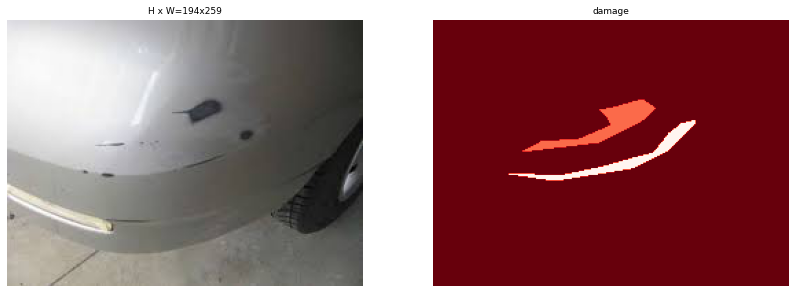

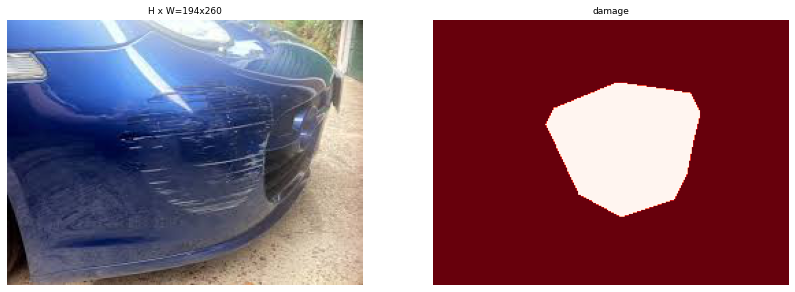

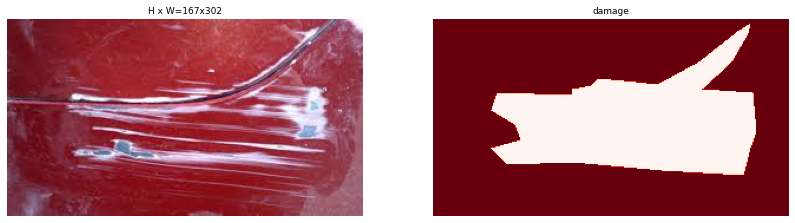

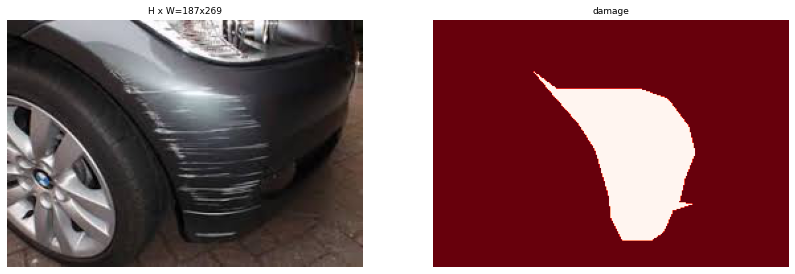

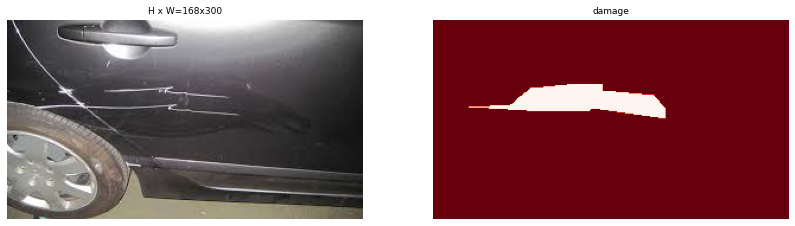

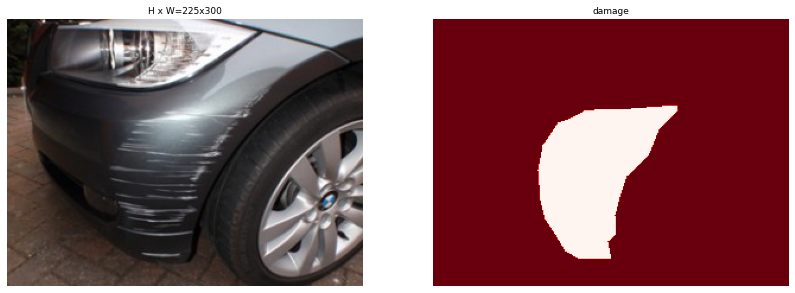

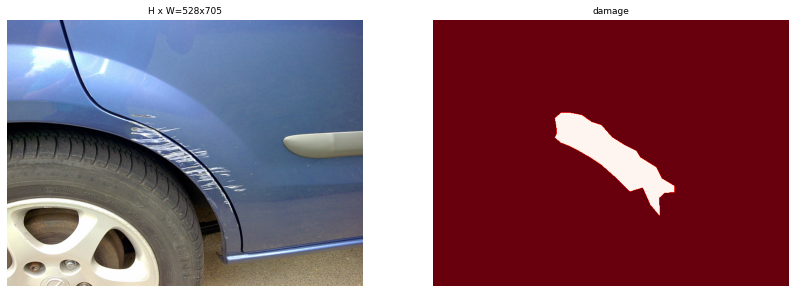

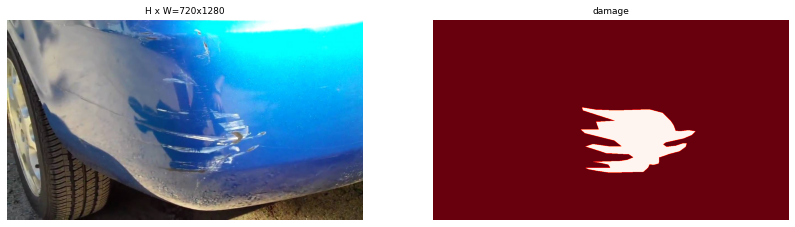

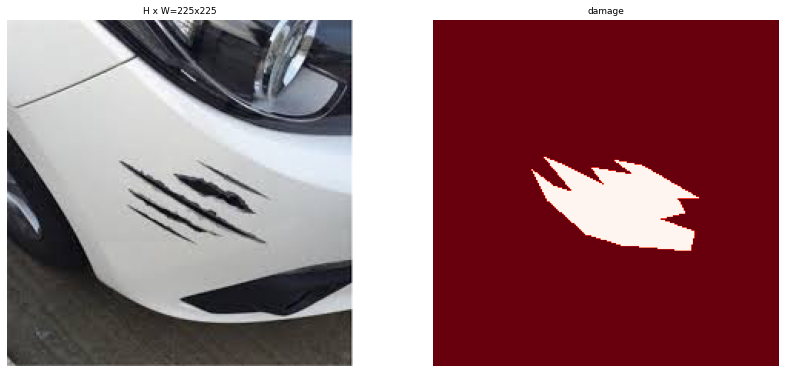

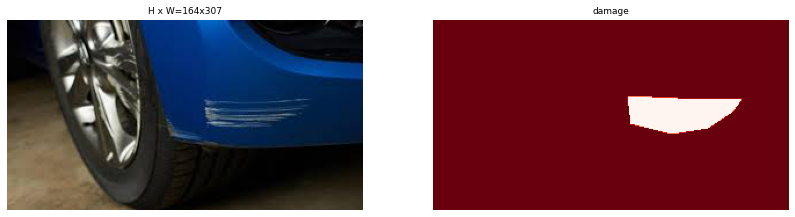

In [ ]:
# Display the random image samples
image_ids = np.random.choice(dataset.image_ids, 10)
print("The random sample images of the damaged cars along with the segmented parts are as follows: ")
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

## 6) Bounding Box with annotated damage mask for a car image.

image_id  33 /content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/custom/train/image36.jpg
image                    shape: (180, 279, 3)         min:    0.00000  max:  255.00000  uint8
mask                     shape: (180, 279, 1)         min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (1, 4)                min:   32.00000  max:  276.00000  int32


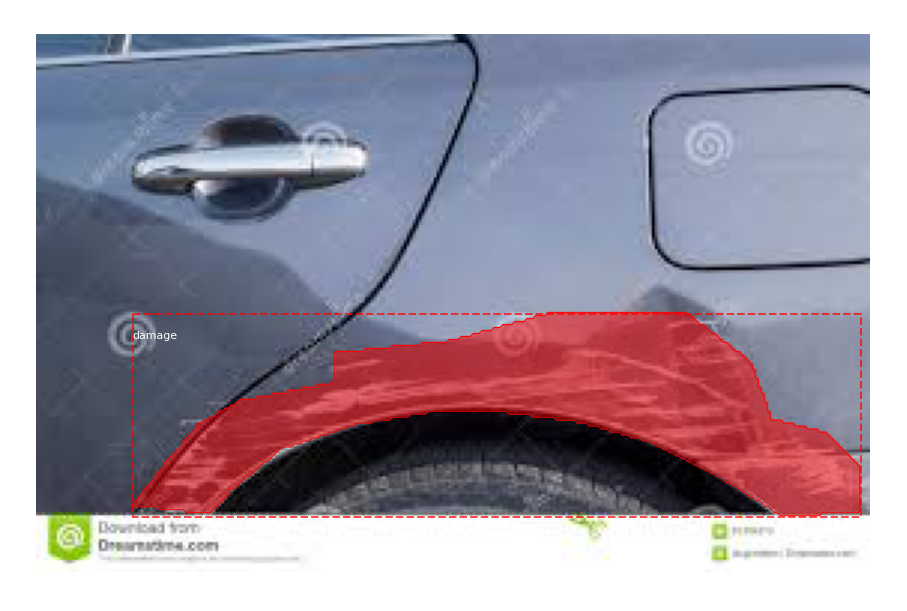

In [ ]:
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)

# Calculate the Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional statistics
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)

# Display image and their respective instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

image_id  36 /content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/custom/train/image39.jpg
image                    shape: (227, 300, 3)         min:    7.00000  max:  255.00000  uint8
mask                     shape: (227, 300, 1)         min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (1, 4)                min:   75.00000  max:  209.00000  int32


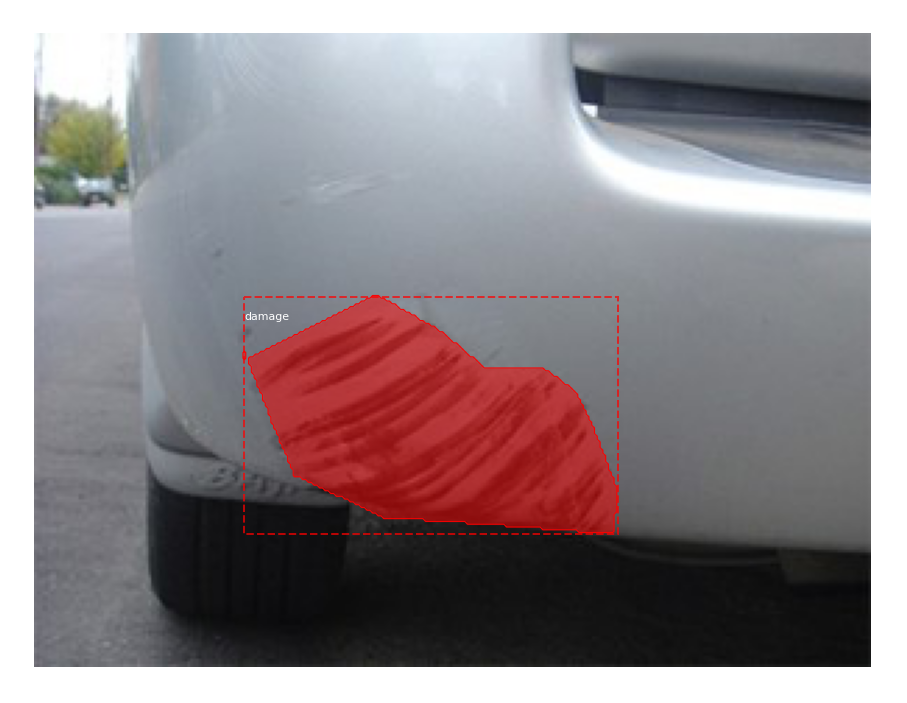

In [ ]:
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)

# Calculate the Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional statistics
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)

# Display image and their respective instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

### The components of image annotations are X and Y co-ordinates of all labeled damages which are marked using polygon' and class name is 'scratch' for the car images

In [ ]:
# Loading the Annotation File
annotations1 = json.load(open(os.path.join(ROOT_DIR, "/content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/custom/train/via_region_data.json"),encoding="utf8"))
annotations = list(annotations1.values()) 
annotations = [a for a in annotations if a['regions']]
# image2.jpg
display("Annotation File Details : " ,annotations[0])

'Annotation File Details : '

{'base64_img_data': '',
 'file_attributes': {},
 'filename': 'image2.jpg',
 'fileref': '',
 'regions': {'0': {'region_attributes': {'Scratch': 'scratch'},
   'shape_attributes': {'all_points_x': [428,
     429,
     480,
     518,
     557,
     577,
     610,
     660,
     642,
     578,
     579,
     585,
     590,
     574,
     580,
     516,
     507,
     474,
     427,
     426,
     412,
     412,
     430,
     470,
     452,
     428],
    'all_points_y': [232,
     216,
     198,
     193,
     212,
     238,
     237,
     242,
     248,
     248,
     260,
     292,
     343,
     409,
     417,
     441,
     443,
     427,
     413,
     381,
     324,
     301,
     288,
     249,
     231,
     232],
    'name': 'polygon'}},
  '1': {'region_attributes': {'Scratch': 'scratch'},
   'shape_attributes': {'all_points_x': [470,
     500,
     578,
     718,
     670,
     594,
     553,
     510,
     469,
     448,
     470],
    'all_points_y': [516, 548, 562, 557, 569, 

### X and Y co-ordinates of the polygon to calculate area of the marked/detected damage

In [ ]:
annotations[1]['regions']['0']['shape_attributes']
l = []
for d in annotations[1]['regions']['0']['shape_attributes'].values():
    l.append(d)
display('x co-ordinates of the damage car part:',l[1])    
display('y co-ordinates of the damage car part:',l[2])

'x co-ordinates of the damage car part:'

[293, 360, 349, 308, 293]

'y co-ordinates of the damage car part:'

[303, 330, 314, 302, 303]

## 7) Use the Inference mode code for Prediction and Damage Detection

#### Model description consists of Model Information like CNN architecture name: 'resnet101', ROI threshold = 0.9,configuration description, weightage of different loss components, mask shape, WEIGHT_DECAY etc. 


In [ ]:
# Load the custom dataset
config = custom.CustomConfig()
ROOT_DIR = "/content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN"
print(" ROOT Directory =" ,ROOT_DIR)
CUSTOM_DIR = os.path.join(ROOT_DIR + "/custom/")
print(" Custom Directory =" ,CUSTOM_DIR)
print("Model Description")
class InferenceConfig(config.__class__):
    # Run damage detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

DEVICE = "/cpu:0" 

# Inference mode for testing
TEST_MODE = "inference"

 ROOT Directory = /content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN
 Custom Directory = /content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/custom/
Model Description

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE           

## 8) Function to visualize predicted damage masks and load the model weights for prediction

In [ ]:
# Get axis function tp create visualization
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

# Reload library
from importlib import reload 
reload(visualize)

<module 'mrcnn.visualize' from '/content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/Mask_RCNN/mrcnn/visualize.py'>

In [ ]:
!pip3 show scikit-image

Name: scikit-image
Version: 0.16.2
Summary: Image processing routines for SciPy
Home-page: https://scikit-image.org
Author: None
Author-email: None
License: Modified BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: imageio, scipy, networkx, PyWavelets, matplotlib, pillow
Required-by: keras-vis, imgaug


In [ ]:
!pip show h5py

Name: h5py
Version: 3.1.0
Summary: Read and write HDF5 files from Python
Home-page: http://www.h5py.org
Author: Andrew Collette
Author-email: andrew.collette@gmail.com
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, cached-property
Required-by: tensorflow, Keras, keras-vis


In [ ]:
# Creating model in Inference mode
import tensorflow as tf
with tf.device(DEVICE):
  model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Loading the last best model which is trained
# weights_path = model.find_last()[1]
custom_WEIGHTS_PATH = '/content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/logs/mask_rcnn_coco.h5'

# Load weights
print("Loading weights ", custom_WEIGHTS_PATH)
model.load_weights(custom_WEIGHTS_PATH, by_name=True, exclude=["mrcnn_class_logits","rpn_model","mrcnn_mask", "mrcnn_bbox_fc", "mrcnn_bbox"]) 

Instructions for updating:
box_ind is deprecated, use box_indices instead
Instructions for updating:
Use fn_output_signature instead
Instructions for updating:
Use `tf.cast` instead.
Loading weights  /content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/logs/mask_rcnn_coco.h5


## 9) Loading validation dataset for prediction

In [ ]:
dataset = custom_1.CustomDataset()
dataset.load_custom(custom_DIR,'val')
dataset.prepare()
print('Images =  {}\nClasses = {}'.format(len(dataset.image_ids), dataset.class_names))

Images =  6
Classes = ['BG', 'scratch']


## 10) Visualize model weight matrix descriptive statistics in the form of shapes, histograms

In [ ]:
visualize.display_weight_stats(model)

## 11) Histogram of weights

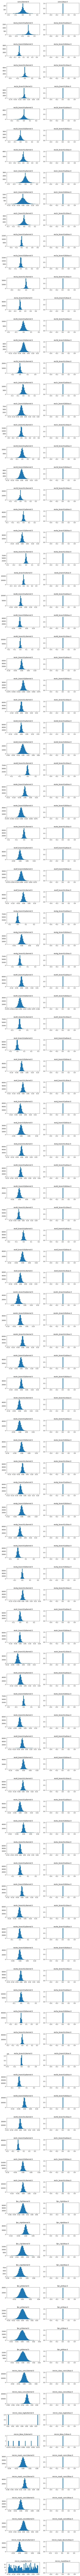

In [ ]:
# layer types to display
LAYER_TYPES = ['Conv2D', 'Dense', 'Conv2DTranspose']

# Get layers
layers = model.get_trainable_layers()
layers = list(filter(lambda l: l.__class__.__name__ in LAYER_TYPES, 
                layers))
# Display Histograms
fig, ax = plt.subplots(len(layers), 2, figsize=(10, 3*len(layers)),
                       gridspec_kw={"hspace":1})
for l, layer in enumerate(layers):
    weights = layer.get_weights()
    for w, weight in enumerate(weights):
        tensor = layer.weights[w]
        ax[l, w].set_title(tensor.name)
        _ = ax[l, w].hist(weight[w].flatten(), 50)

## 12) Prediction on a random validation image
#### 1) Image 1

image ID: scratch.image55.jpg (4) /content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/custom/val/image55.jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


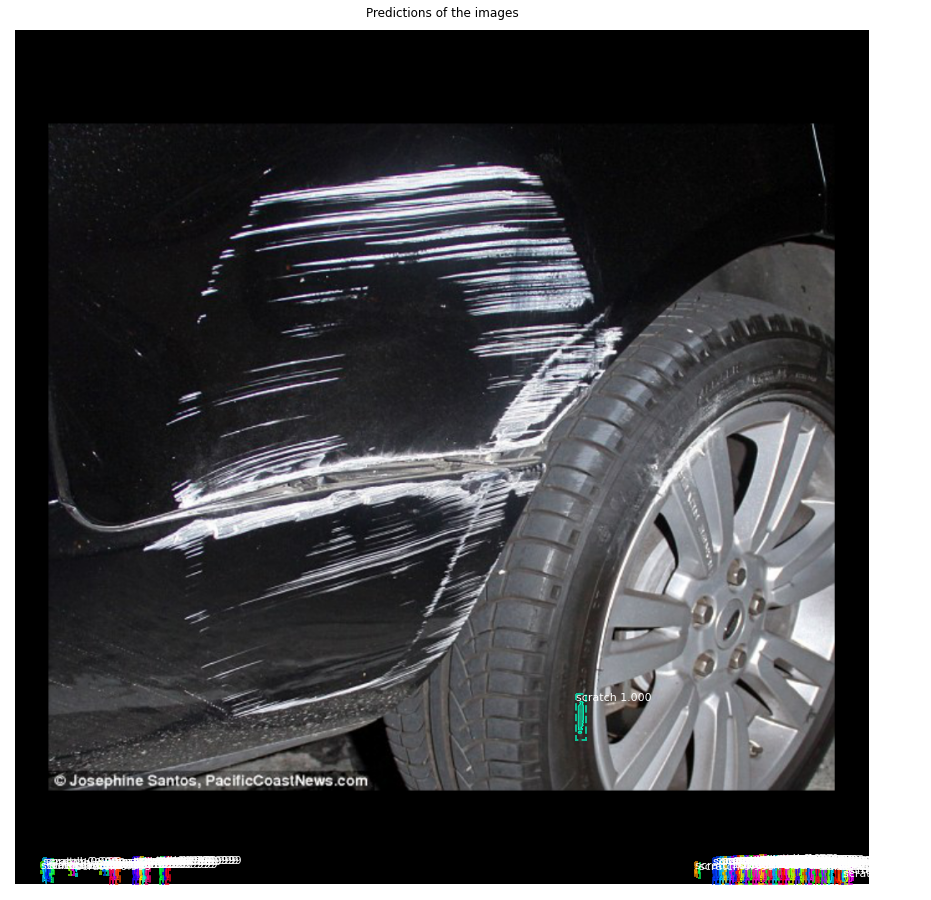

gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:   61.00000  max:  821.00000  int32
gt_mask                  shape: (56, 56, 1)           min:    0.00000  max:    1.00000  bool
The car is having:1 damages


In [ ]:
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=True)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Result for object detection 
results = model.detect([image], verbose=1)

# Display the results of visualization
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions of the images")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)
print('The car is having:{} damages'.format(len(dataset.image_info[image_id]['polygons'])))

#### 2) Image 2

image ID: scratch.image51.png (0) /content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/custom/val/image51.png
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


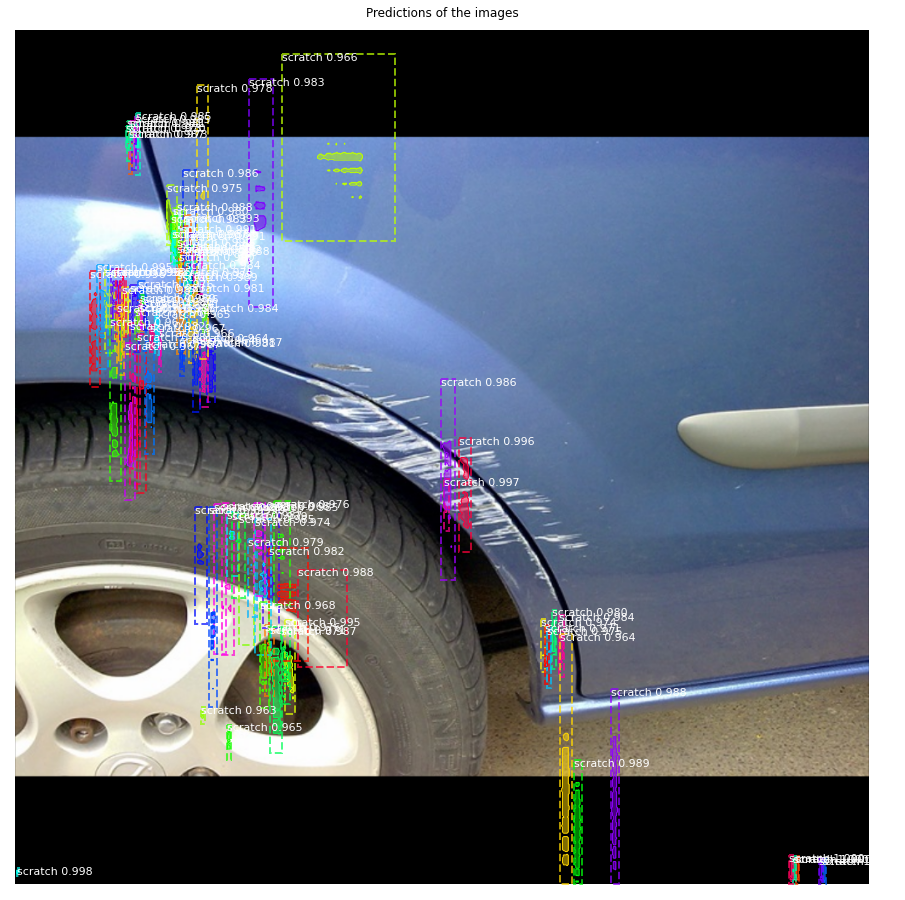

gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:  351.00000  max:  689.00000  int32
gt_mask                  shape: (56, 56, 1)           min:    0.00000  max:    1.00000  bool
The car is having:1 damages


In [ ]:
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=True)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Result for object detection
results = model.detect([image], verbose=1)

# Display the results of visualization
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions of the images")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)
print('The car is having:{} damages'.format(len(dataset.image_info[image_id]['polygons'])))